# Importing libraries

In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Importing Dataset

In [3]:
crime_data=pd.read_csv('crime_data.csv')
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Data Understanding

In [4]:
crime_data.shape

(50, 5)

In [5]:
crime_data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


# Data Visualization

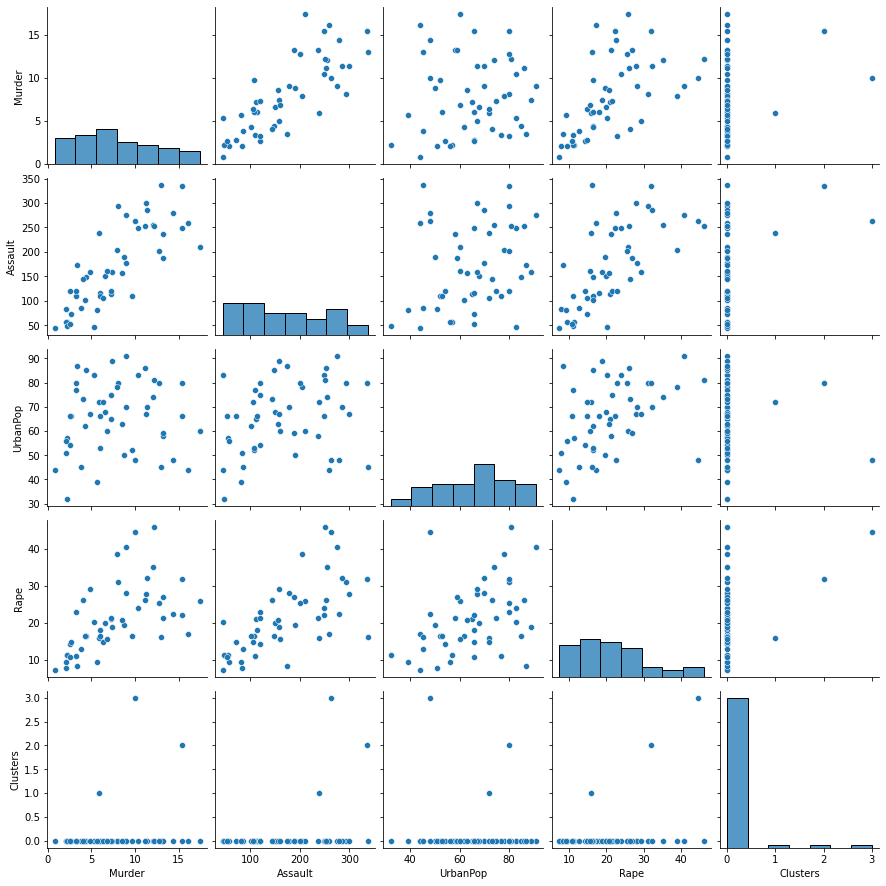

In [127]:
sns.pairplot(crime_data)

# Data Preprocessing

In [7]:
crime_data=crime_data.rename(columns={'Unnamed: 0':'Unnamed'})

In [8]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
norm_crime = norm_func(crime_data.iloc[:,1:])

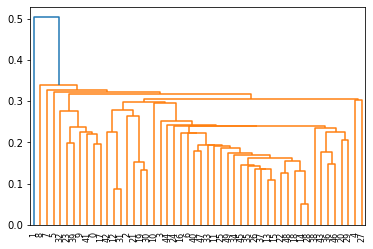

In [13]:
dendrogram = sch.dendrogram(sch.linkage(norm_crime, method='single'))

In [10]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [11]:
y_hc=hc.fit_predict(norm_crime)
y_hc

array([0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
clusters=pd.DataFrame(y_hc,columns=['Clusters'])
clusters.head()

,Clusters
0,0
1,3
2,0
3,0
4,0


In [13]:
crime_data['Clusters']=clusters

In [14]:
crime_data[crime_data['Clusters']==0].head()

,Unnamed,Murder,Assault,UrbanPop,Rape,Clusters
0,Alabama,13.2,236,58,21.2,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0


# For K-Means Clustering

#### Importing Necessary Libraries for K-Means

In [15]:
from sklearn.cluster import KMeans

# Data Preprocessing

In [16]:
crime_new=crime_data.drop(columns=['Unnamed','Clusters'],axis=1)

In [36]:
crime_new.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler
sts=StandardScaler()
scaled_crime=sts.fit_transform(crime_new)

In [38]:
scaled_crime=pd.DataFrame(scaled_crime,columns=crime_new.columns)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1 [200.0]
2 [200.0, 104.96163315756873]
3 [200.0, 104.96163315756873, 80.08886132199619]
4 [200.0, 104.96163315756873, 80.08886132199619, 57.55425863091106]
5 [200.0, 104.96163315756873, 80.08886132199619, 57.55425863091106, 50.520265525350695]
6 [200.0, 104.96163315756873, 80.08886132199619, 57.55425863091106, 50.520265525350695, 43.92746404497574]
7 [200.0, 104.96163315756873, 80.08886132199619, 57.55425863091106, 50.520265525350695, 43.92746404497574, 40.52183461131975]
8 [200.0, 104.96163315756873, 80.08886132199619, 57.55425863091106, 50.520265525350695, 43.92746404497574, 40.52183461131975, 34.687388397849084]
9 [200.0, 104.96163315756873, 80.08886132199619, 57.55425863091106, 50.520265525350695, 43.92746404497574, 40.52183461131975, 34.687388397849084, 32.70648136388185]
10 [200.0, 104.96163315756873, 80.08886132199619, 57.55425863091106, 50.520265525350695, 43.92746404497574, 40.52183461131975, 34.687388397849084, 32.70648136388185, 28.311639397122555]


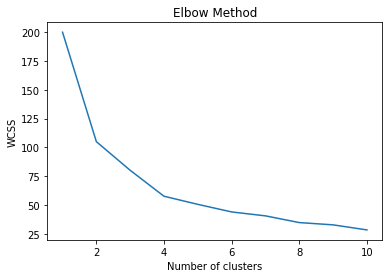

In [39]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime)
    wcss.append(kmeans.inertia_)
    print(i,wcss)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
clusters_new = KMeans(4, random_state=13)
clusters_new.fit(scaled_crime)

KMeans(n_clusters=4, random_state=13)

In [41]:
clusters_new.labels_

array([3, 2, 2, 3, 2, 2, 0, 0, 2, 3, 0, 1, 2, 0, 1, 0, 1, 3, 1, 2, 0, 2,
       1, 3, 2, 1, 1, 2, 1, 0, 2, 2, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 2, 0,
       1, 0, 0, 1, 1, 0])

In [42]:
crime_new['clusters_new'] = clusters_new.labels_

In [43]:
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [44]:
crime_new[crime_new['clusters_new']==0]
# For k=1

,Murder,Assault,UrbanPop,Rape,clusters_new
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
10,5.3,46,83,20.2,0
13,7.2,113,65,21.0,0
15,6.0,115,66,18.0,0
20,4.4,149,85,16.3,0
29,7.4,159,89,18.8,0
34,7.3,120,75,21.4,0
35,6.6,151,68,20.0,0
36,4.9,159,67,29.3,0


In [24]:
crime_new[crime_new['clusters_new']==1]
# For k= 2

,Murder,Assault,UrbanPop,Rape,clusters_new
11,2.6,120,54,14.2,1
14,2.2,56,57,11.3,1
16,9.7,109,52,16.3,1
18,2.1,83,51,7.8,1
22,2.7,72,66,14.9,1
25,6.0,109,53,16.4,1
26,4.3,102,62,16.5,1
28,2.1,57,56,9.5,1
33,0.8,45,44,7.3,1
40,3.8,86,45,12.8,1


In [25]:
crime_new[crime_new['clusters_new']==2]
# For k= 3

,Murder,Assault,UrbanPop,Rape,clusters_new
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
8,15.4,335,80,31.9,2
12,10.4,249,83,24.0,2
19,11.3,300,67,27.8,2
21,12.1,255,74,35.1,2
24,9.0,178,70,28.2,2
27,12.2,252,81,46.0,2


In [26]:
crime_new[crime_new['clusters_new']==3]
# For k= 4

,Murder,Assault,UrbanPop,Rape,clusters_new
0,13.2,236,58,21.2,3
3,8.8,190,50,19.5,3
9,17.4,211,60,25.8,3
17,15.4,249,66,22.2,3
23,16.1,259,44,17.1,3
32,13.0,337,45,16.1,3
39,14.4,279,48,22.5,3
41,13.2,188,59,26.9,3


###  For DBSCAN

In [27]:
from sklearn.cluster import DBSCAN

In [29]:
crime_new=crime_new.drop(['clusters_new'],axis=1)

In [30]:
crime_new.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [45]:
scaled_crime.head()


,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [118]:
dbs=DBSCAN(min_samples=2,eps=2)
class_pr=dbs.fit_predict(scaled_crime)

In [119]:
scaled_crime["class_pr"]=class_pr

In [120]:
set(class_pr)

{-1, 0, 1}

In [116]:
scaled_crime['class_pr']=dbs.labels_

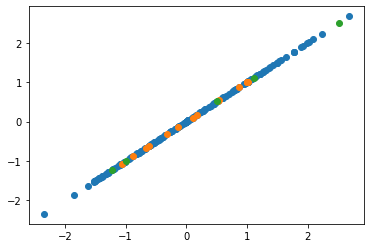

In [122]:
for i in set(class_pr):
    plt.scatter(scaled_crime[scaled_crime["class_pr"]==i],scaled_crime[scaled_crime["class_pr"]==i])

In [128]:
# DBSCAN is not working good beacuse our data is linear in nature